<a href="https://colab.research.google.com/github/Utkarsh13tiwari/Deep-Learning-Models/blob/main/AVSE_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import Dependencies

In [1]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

# 1. Build Data Loading Functions

In [5]:
import gdown

In [6]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From: https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
To: /content/data.zip
100%|██████████| 423M/423M [00:09<00:00, 45.7MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [7]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [119]:
# Lip croping using dlip



"""

import dlib
import cv2
import os
           # The path for the working log file
LIP_MARGIN = 0.5                # Marginal rate for lip-only image.
RESIZE = (80,80)                # Final image size
# Face detector and landmark detector
face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks (2).dat")


def shape_to_list(shape):
	coords = []
	for i in range(0, 68):
		coords.append((shape.part(i).x, shape.part(i).y))
	return coords

def load_video(path:str) -> List[float]:
    vid_path = path
    vid = cv2.VideoCapture(vid_path)       # Read video

    # Parse into frames
    frame_buffer = []               # A list to hold frame images
    frame_buffer_color = []         # A list to hold original frame images
    while(True):
        success, frame = vid.read()                # Read frame
        if not success:
            break                           # Break if no frame to read left
        gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)   # Convert image into grayscale
        frame_buffer.append(gray)                  # Add image to the frame buffer
        frame_buffer_color.append(frame)
    vid.release()

    # Obtain face landmark information
    landmark_buffer = []        # A list to hold face landmark information
    for (i, image) in enumerate(frame_buffer):          # Iterate on frame buffer
        face_rects = face_detector(image,1)             # Detect face
        rect = face_rects[0]                    # Proper number of face
        landmark = landmark_detector(image, rect)   # Detect face landmarks
        landmark = shape_to_list(landmark)
        landmark_buffer.append(landmark)

    # Crop images
    cropped_buffer = []
    for (i,landmark) in enumerate(landmark_buffer):
        lip_landmark = landmark[48:68]                                          # Landmark corresponding to lip
        lip_x = sorted(lip_landmark,key = lambda pointx: pointx[0])             # Lip landmark sorted for determining lip region
        lip_y = sorted(lip_landmark, key = lambda pointy: pointy[1])
        x_add = int((-lip_x[0][0]+lip_x[-1][0])*LIP_MARGIN)                     # Determine Margins for lip-only image
        y_add = int((-lip_y[0][1]+lip_y[-1][1])*LIP_MARGIN)
        crop_pos = (lip_x[0][0]-x_add, lip_x[-1][0]+x_add, lip_y[0][1]-y_add, lip_y[-1][1]+y_add)   # Crop image
        cropped = frame_buffer_color[i][crop_pos[2]:crop_pos[3],crop_pos[0]:crop_pos[1]]
        cropped = cv2.resize(cropped,(RESIZE[0],RESIZE[1]),interpolation=cv2.INTER_CUBIC)        # Resize
        cropped_buffer.append(cropped)

    return cropped_buffer


  """

'\n\nimport dlib\nimport cv2\nimport os\n           # The path for the working log file\nLIP_MARGIN = 0.5                # Marginal rate for lip-only image.\nRESIZE = (80,80)                # Final image size\n# Face detector and landmark detector\nface_detector = dlib.get_frontal_face_detector()\nlandmark_detector = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks (2).dat")\n\n\ndef shape_to_list(shape):\n\tcoords = []\n\tfor i in range(0, 68):\n\t\tcoords.append((shape.part(i).x, shape.part(i).y))\n\treturn coords\n\ndef load_video(path:str) -> List[float]:\n    vid_path = path\n    vid = cv2.VideoCapture(vid_path)       # Read video\n\n    # Parse into frames\n    frame_buffer = []               # A list to hold frame images\n    frame_buffer_color = []         # A list to hold original frame images\n    while(True):\n        success, frame = vid.read()                # Read frame\n        if not success:\n            break                           # Break if no fra

In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [9]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [10]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [13]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [15]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [21]:
test_path = '/content/data/s1/bbaf2n.mpg'
file_name=test_path.split('/')[-1].split('.')[0]
print(file_name)
alignment_path = os.path.join("data/alignments/s1/",f'{file_name}.align')
print(alignment_path)

bbaf2n
data/alignments/s1/bbaf2n.align


In [23]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbaf2n'

In [24]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

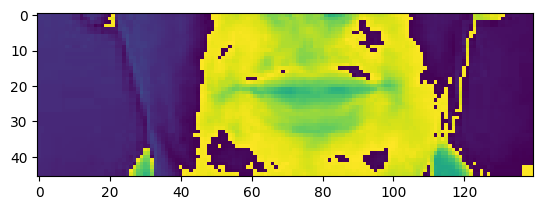

In [25]:
plt.imshow(frames[40])

In [26]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39,  6, 39, 20, 23, 15,
       39, 14, 15, 23])>

In [27]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f two now'>

In [28]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [29]:
from matplotlib import pyplot as plt

In [30]:
data = tf.data.Dataset.list_files('/content/data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [32]:
len(test)

50

In [33]:
frames, alignments = data.as_numpy_iterator().next()

In [34]:
len(frames)

2

In [35]:
sample = data.as_numpy_iterator().next()

In [36]:
val = sample
val[0]

array([[[[[1.3732013 ],
          [1.3732013 ],
          [1.3732013 ],
          ...,
          [0.25295812],
          [0.25295812],
          [0.32523188]],

         [[1.4454751 ],
          [1.2286538 ],
          [1.2647907 ],
          ...,
          [0.25295812],
          [0.25295812],
          [0.32523188]],

         [[1.4454751 ],
          [1.4454751 ],
          [1.4093381 ],
          ...,
          [0.289095  ],
          [0.32523188],
          [0.32523188]],

         ...,

         [[1.0479695 ],
          [1.0479695 ],
          [1.0479695 ],
          ...,
          [0.10841063],
          [0.10841063],
          [0.10841063]],

         [[1.0118325 ],
          [1.0118325 ],
          [1.0118325 ],
          ...,
          [0.07227375],
          [0.07227375],
          [0.07227375]],

         [[0.97569567],
          [0.97569567],
          [0.97569567],
          ...,
          [0.07227375],
          [0.07227375],
          [0.03613688]]],


        [[[1.5538

In [37]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

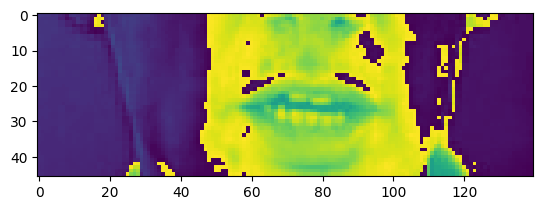

In [38]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

In [39]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lay green in r nine soon'>

# 3. Deep Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [41]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [42]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [44]:
5*17*75

6375

In [48]:
model.input_shape

(None, 75, 46, 140, 1)

In [49]:
model.output_shape

(None, 75, 41)

# 4. Traning

In [50]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [51]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [52]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [72]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [73]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [74]:
schedule_callback = LearningRateScheduler(scheduler)

In [75]:
example_callback = ProduceExample(test)

In [77]:
model.fit(train, validation_data=test, epochs=2, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/2
1/1 [==============================] - 3s 3s/step
Original: place red in c three soon
Prediction: la re t e oa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: bin blue by z nine soon
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 881s 2s/step - loss: 61.8944 - val_loss: 58.5426 - lr: 1.0000e-04
Epoch 2/2
1/1 [==============================] - 0s 205ms/step
Original: place white at q three again
Prediction: la re t e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay blue by y five again
Prediction: la re t e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 666s 1s/step - loss: 59.7623 - val_loss: 53.4586 - lr: 1.0000e-04


# 5.Prediction

In [78]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From: https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 202MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [79]:
from tensorflow.keras.optimizers.legacy import Adam
model.load_weights('models/checkpoint')

In [80]:
test_data = test.as_numpy_iterator()

In [81]:
sample = test_data.next()

In [82]:
yhat = model.predict(sample[0])

1/1 [==============================] - 0s 252ms/step


In [83]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set white with p three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set red with i three soon'>]

In [84]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [85]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set white with p three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set red with i three soon'>]

# Test on a Video

In [104]:
sample = load_data(tf.convert_to_tensor('./data/s1/bras9a.mpg'))
sample2=load_data(tf.convert_to_tensor('/content/data/s1/bbif1a.mpg'))

In [117]:
print('-'*100, 'REAL TEXT')
original_text1=[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]
original_text2=[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample2[1]]]

print(original_text1)
print(original_text2)

---------------------------------------------------------------------------------------------------- REAL TEXT
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue in f one again'>]


In [106]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))
text2 = model.predict(tf.expand_dims(sample2[0], axis=0))

1/1 [==============================] - 0s 107ms/step


In [107]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()
text_predict = tf.keras.backend.ctc_decode(text2, input_length=[75], greedy=True)[0][0].numpy()

In [116]:
print('~'*100, 'PREDICTIONS')
predict1=[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]
predict2=[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in text_predict]

print(predict1)
print(predict2)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]
[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue in f one again'>]
